# Example 3.4: GD training of a perceptron layer

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set the parameter for the layer and training

In [2]:
no_features = 3
no_labels = 2
no_data = 8

lr = 0.1
no_iters = 10000

SEED = 10
np.random.seed(SEED)

## Generate training data

In [3]:
# generate training data
X = np.random.rand(no_data, no_features)
Y = np.zeros((no_data, no_labels))
Y[:,0] = (X[:,0] + X[:,1]**2 + X[:, 2]**3 + np.random.rand(no_data))/4
Y[:,1] = (X[:,0] + X[:,1] + X[:, 2] + X[:,0]*X[:,1]*X[:,2] + np.random.rand(no_data))/5

print('X = {}'.format(X))
print('Y = {}'.format(Y))
print('alpha = {}'.format(lr))

X = [[0.77132064 0.02075195 0.63364823]
 [0.74880388 0.49850701 0.22479665]
 [0.19806286 0.76053071 0.16911084]
 [0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096]
 [0.61252607 0.72175532 0.29187607]
 [0.91777412 0.71457578 0.54254437]
 [0.14217005 0.37334076 0.67413362]]
Y = [[0.36700015 0.46890243]
 [0.36067172 0.37505132]
 [0.34976828 0.24872748]
 [0.48444787 0.41710316]
 [0.36332573 0.28887784]
 [0.43984029 0.51677508]
 [0.59832905 0.51552032]
 [0.27739117 0.37034263]]
alpha = 0.1


## Define the class for a perceptron layer

In [4]:
class Perceptron_Layer():
  def __init__(self, no_features, no_labels):
    self.w = tf.Variable(np.random.rand(no_features, no_labels)*0.05, dtype=tf.float64)
    self.b = tf.Variable(tf.zeros([no_labels], dtype=tf.float64))

  def __call__(self, x):
    u = tf.matmul(x, self.w) + self.b
    y = tf.sigmoid(u)
    return u, y

In [5]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.reduce_sum(tf.square(target_y - predicted_y), axis=1))

In [6]:
def train(model, inputs, outputs, learning_rate):
    _, y = model(inputs)
    dy = y*(1 - y)
    grad_u = -(outputs - y)*dy
    grad_w = tf.matmul(tf.transpose(inputs), grad_u)
    grad_b = tf.reduce_sum(grad_u, axis = 0)
    
    model.w.assign_sub(learning_rate * grad_w)
    model.b.assign_sub(learning_rate * grad_b)
    
    return dy, grad_u, grad_w, grad_b

## Initialize the perceptron layer

In [7]:
model = Perceptron_Layer(no_features, no_labels)

print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[0.02737931 0.04096435]
 [0.00994738 0.04284252]
 [0.01758263 0.03773238]], b: [0. 0.]


## Train the perceptron layer

In [8]:
cost = []
for i in range(no_iters):
    u_, y_ = model(X)
    loss_ = loss(y_, Y)
    dy_, grad_u_, grad_w_, grad_b_ = train(model, X, Y, lr)
    
    if (i < 2 or i == no_iters - 1):
        print('iter: {}'.format(i+1))
        print('u: {}'.format(u_))
        print('y: {}'.format(y_))
    
        print('m.s.e: {}'.format(loss_))
          
        print('dy: {}'.format(dy_))
        print('grad_u: {}'.format(grad_u_))
        print('grad_w: {}'.format(grad_w_))
        print('grad_b: {}'.format(grad_b_))

        print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
  
    cost.append(loss_)

    if not i%200:
        print('epoch:{}, loss:{}'.format(i,cost[i]))

iter: 1
u: [[0.03246586 0.05639477]
 [0.02941309 0.06051367]
 [0.01596152 0.04707752]
 [0.02599938 0.06895513]
 [0.01949109 0.05276747]
 [0.02908206 0.06702673]
 [0.04177553 0.08868174]
 [0.01945932 0.04725543]]
y: [[0.50811575 0.51409496]
 [0.50735274 0.5151238 ]
 [0.5039903  0.51176721]
 [0.50649948 0.51723195]
 [0.50487262 0.51318881]
 [0.50727    0.51675041]
 [0.51044236 0.52215592]
 [0.50486468 0.51181166]]
m.s.e: 0.040125181814309
dy: [[0.24993413 0.24980133]
 [0.24994594 0.24977127]
 [0.24998408 0.24986153]
 [0.24995776 0.24970306]
 [0.24997626 0.24982606]
 [0.24994715 0.24971942]
 [0.24989096 0.24950912]
 [0.24997633 0.24986048]]
grad_u: [[ 3.52696045e-02  1.12891542e-02]
 [ 3.66623250e-02  3.49860812e-02]
 [ 3.85530485e-02  6.57235085e-02]
 [ 5.51197077e-03  2.50024655e-02]
 [ 3.53833616e-02  5.60387245e-02]
 [ 1.68538644e-02 -6.16146671e-06]
 [-2.19620871e-02  1.65564230e-03]
 [ 5.68629937e-02  3.53475203e-02]]
grad_w: [[0.06117103 0.05689372]
 [0.08792995 0.12787342]
 [0.102

In [9]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('loss:{}'.format(cost[i]))

w: [[1.08203095 1.14034734]
 [1.42454337 0.39919455]
 [1.14653011 0.84453119]], b: [-2.24515506 -1.57582409]
loss:0.002811415240125915


## Plot the learning curves

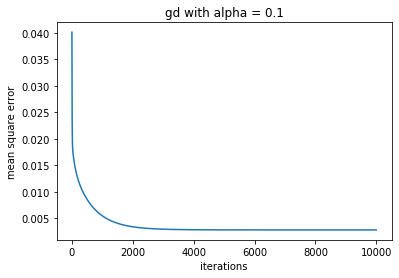

In [10]:
# plot learning curves
plt.figure(1)
plt.plot(range(no_iters), cost)
plt.xlabel('iterations')
plt.ylabel('mean square error')
plt.title('gd with alpha = {}'.format(lr))
plt.savefig('./figures/3.4_1.png')

## Plot the training data and the predictions

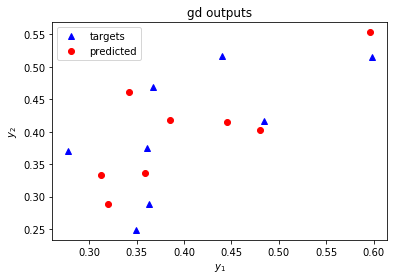

In [11]:
_, pred = model(X)

plt.figure(2)
plot_targets = plt.plot(Y[:,0], Y[:,1], 'b^', label='targets')
plot_pred = plt.plot(pred[:,0], pred[:,1], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('gd outputs')
plt.legend()
plt.savefig('./figures/3.4_2.png')